In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
k = 41   # my id is 0432220005101041
np.random.seed(42)  # Fixing seed for reproducibility

# Dataset rule: exam scores = 60 + randint(0,15,size=12) + (k % 5)
data = 60 + np.random.randint(0, 15, size=12) + (k % 5)
print("Generated Exam Scores:", data)

Generated Exam Scores: [67 64 73 75 71 68 73 65 67 70 63 67]


In [3]:
population_mean = 65

In [4]:
t_statistic, p_value = stats.ttest_1samp(data, population_mean)

sample_mean = np.mean(data)
df = len(data) - 1   # degrees of freedom

# Confidence Interval (95%)
ci = stats.t.interval(
    0.95,                       # confidence level
    df=df,                      # degrees of freedom
    loc=sample_mean,            # sample mean
    scale=stats.sem(data)       # standard error of mean
)


In [5]:
print("\n--- One-Sample t-Test Results ---")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Hypothesized Mean: {population_mean}")
print(f"t-Statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"p-Value: {p_value:.4f}")
print(f"95% Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]")


--- One-Sample t-Test Results ---
Sample Mean: 68.58
Hypothesized Mean: 65
t-Statistic: 3.2454
Degrees of Freedom: 11
p-Value: 0.0078
95% Confidence Interval: [66.15, 71.01]


In [6]:
alpha = 0.05
if p_value < alpha:
    print(f"\nDecision: Reject H0 → The sample mean is significantly different from {population_mean}.")
else:
    print(f"\nDecision: Fail to Reject H0 → No significant difference from {population_mean}.")


Decision: Reject H0 → The sample mean is significantly different from 65.


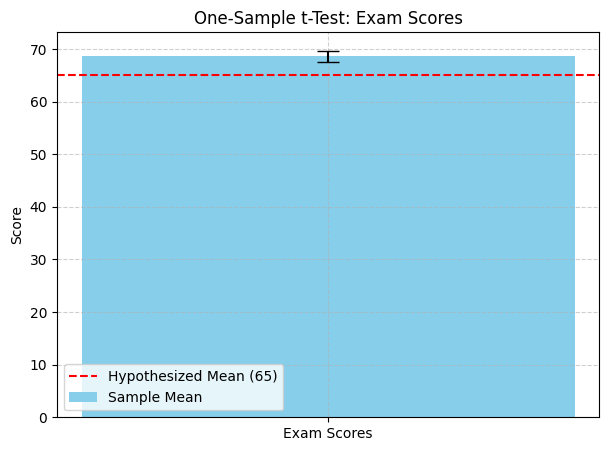

In [7]:
plt.figure(figsize=(7,5))

# Bar for sample mean
plt.bar(1, sample_mean, color="skyblue", label="Sample Mean")

# Error bar = ± 1 Standard Error
plt.errorbar(1, sample_mean, yerr=stats.sem(data), fmt='k', capsize=8, linewidth=1.5)

# Hypothesized mean line
plt.axhline(y=population_mean, color='r', linestyle='--', linewidth=1.5, label=f"Hypothesized Mean ({population_mean})")

# Formatting
plt.title("One-Sample t-Test: Exam Scores")
plt.xticks([1], ["Exam Scores"])
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()